Here we shall create a model based on the clustering principle. One such way is to use **k-means clustering**, and another is **agglomerative hierarchical clustering**.

The models will be based on the tutorial from the following website:

https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("cust_seg_transformed.csv")

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=5) # To split the customer base into five segments, this means we should use 5 clusters

To be able to use this model, all data must be numerical, i.e. an integer or a float. Alternatively, we could use this method on a few variables extracted from the data frame. For example, we may focus on two variables: antiguedad, and renta.

In [ ]:
df_extracted = df[["antiguedad", "renta"]]

In [ ]:
kmeans.fit(df_extracted)

KMeans(n_clusters=5)

In [ ]:
print(kmeans.cluster_centers_)

[[9.51147800e+01 1.15501562e+05]
 [1.19261146e+02 1.01534147e+07]
 [1.21988312e+02 3.88810033e+05]
 [1.05219355e+02 3.23216912e+06]
 [1.46964286e+02 2.36695603e+07]]


In [ ]:
y_km = kmeans.fit_predict(df_extracted)

In [ ]:
frequency_dict = {}

for y in y_km:
    if y not in frequency_dict:
        frequency_dict[y] = 1
    else:
        frequency_dict[y] += 1

print(frequency_dict)

{0: 924147, 3: 75203, 4: 465, 1: 157, 2: 28}


<AxesSubplot:xlabel='antiguedad', ylabel='renta'>

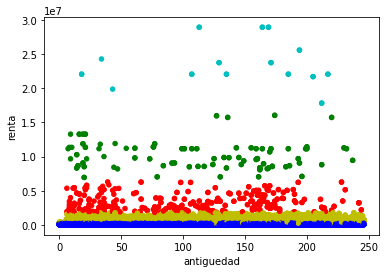

In [ ]:
colormap = {0: "b", 1: "g", 2: "c", 3: "y", 4: "r"}
df["point_colors"] = list(map(lambda x: colormap[x], y_km))

df.plot.scatter("antiguedad", "renta", c=df["point_colors"])

The results of this clustering attempt show how points are clustered by the renta (household income) group, and the points are scattered approximately evenly by antiguedad (customer seniority).

The problem may be in the fact that the data is not normalized so much that the scales of the two variables are vastly different. This problem can be solved by normalizing each column using the z-score. Does normalizing give a different result?

<AxesSubplot:xlabel='antiguedad', ylabel='renta'>

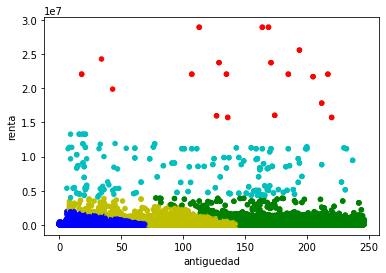

In [ ]:
from scipy.stats import zscore

df_extracted_normalized = df[["antiguedad", "renta"]].apply(zscore)

kmeans.fit(df_extracted_normalized)
y_norm_km = kmeans.fit_predict(df_extracted_normalized)

df_extracted_normalized["point_colors"] = list(map(lambda x: colormap[x], y_norm_km))
df.plot.scatter("antiguedad", "renta", c=df_extracted_normalized["point_colors"])

The results this time are much different. Instead of grouping merely by rent, this segmentation scheme segments customers by those whose household income exceeds $15 million, those whose household income is between $4 million and $15 million, and those whose household income is under $4 million, and with different levels of seniority: new (0-48 months), middle (48-120 months), and senior (120+ months).

Another transformation we can make is to transform the household income data by the log, then normalize.

<AxesSubplot:xlabel='antiguedad', ylabel='renta'>

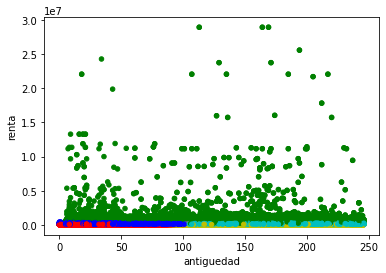

In [ ]:
from math import log

df["renta_log"] = df["renta"].apply(log)

df_extracted_normalized = df[["antiguedad", "renta_log"]].apply(zscore)

kmeans.fit(df_extracted_normalized)
y_norm_km = kmeans.fit_predict(df_extracted_normalized)

df_extracted_normalized["point_colors"] = list(map(lambda x: colormap[x], y_norm_km))
df.plot.scatter("antiguedad", "renta", c=df_extracted_normalized["point_colors"])

However, this plot is not so easy to see in the bottom, so we shall plot the log-transformed household income instead of the raw income, as well as a zoomed in plot of the customers at the bottom.

<AxesSubplot:xlabel='antiguedad', ylabel='renta_log'>

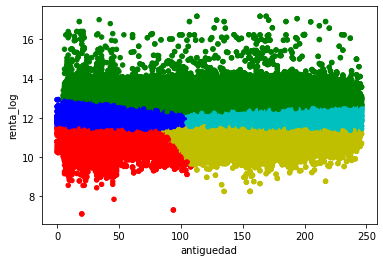

In [ ]:
df.plot.scatter("antiguedad", "renta_log", c=df_extracted_normalized["point_colors"])

<AxesSubplot:xlabel='antiguedad', ylabel='renta'>

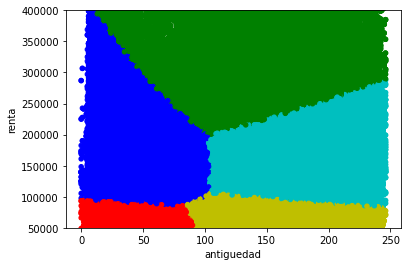

In [ ]:
df.plot.scatter("antiguedad", "renta", c=df_extracted_normalized["point_colors"], ylim=(50000,400000))

Now the results are more clear. Based on this clustering results, the five groups which we could split the customer segment are:

* Customers with lower income (under $100,000) and less seniority (under 96 months)
* Customers with lower income (under $100,000) and more seniority (over 96 months)
* Customers with medium income (between $100,000 and $250,000) and less seniority (under 96 months)
* Customers with medium income (between $100,000 and $250,000) and more seniority (over 96 months)
* Customers with higher income (over $250,000)

Now we shall perform segmentation based on the agglomerative clustering approach on the same data, normalized.

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df_extracted_normalized = df[["antiguedad", "renta"]].apply(zscore)

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df_extracted_normalized, method='ward'))
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_extracted_normalized)

df_extracted_normalized["point_colors_hc"] = list(map(lambda x: colormap[x], y_hc))
df.plot.scatter("antiguedad", "renta", c=df_extracted_normalized["point_colors_hc"])

MemoryError: Unable to allocate 3.64 TiB for an array with shape (499999500000,) and data type float64

Note that agglomerative hierarchical clustering fails because the memory required is too large.

Focusing on the k-means clustering method, we shall perform another such experiment, using the data for age and (log) household income. We repeat the experiment on these two columns.

<AxesSubplot:xlabel='age', ylabel='renta_log'>

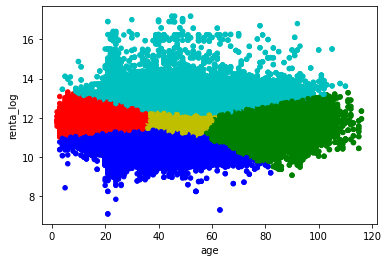

In [ ]:
df_extracted_normalized = df[["age", "renta_log"]].apply(zscore)

kmeans.fit(df_extracted_normalized)
y_norm_km = kmeans.fit_predict(df_extracted_normalized)

df_extracted_normalized["point_colors"] = list(map(lambda x: colormap[x], y_norm_km))
df.plot.scatter("age", "renta_log", c=df_extracted_normalized["point_colors"])

<AxesSubplot:xlabel='age', ylabel='renta'>

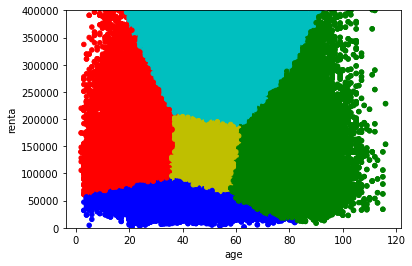

In [ ]:
df.plot.scatter("age", "renta", c=df_extracted_normalized["point_colors"], ylim=(0,400000))

Based on this clustering, we could also segment the customers by the following groups:
* High-income (above $250,000) customers
* Old age (above 60) customers with household income not exceeding $250,000
* Low income (under $70,000) customers with age not exceeding 60
* Other middle aged (35-60) customers
* Other young (under 35) customers